Load the Cleaned Data


In [1]:
import pandas as pd

benin = pd.read_csv("../data/benin_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

benin["country"] = "Benin"
sierra["country"] = "Sierra Leone"
togo["country"] = "Togo"

df_all = pd.concat([benin, sierra, togo])


Boxplots of GHI , DNI, DHI per Country

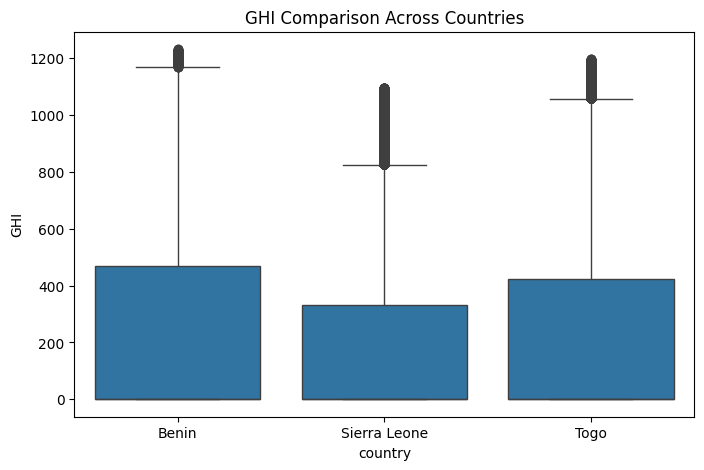

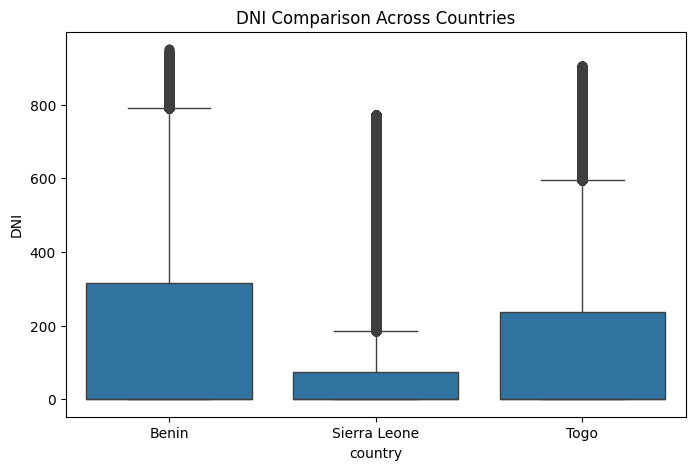

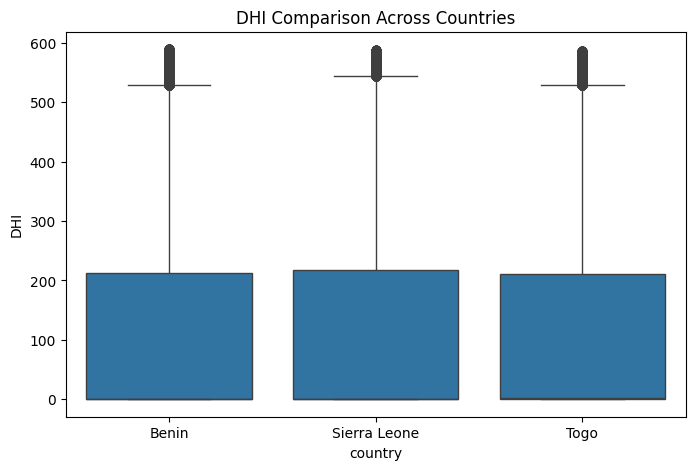

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="country", y=metric, data=df_all)
    plt.title(f"{metric} Comparison Across Countries")
    plt.show()

Summary statistics

In [4]:
summary = df_all.groupby("country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary

GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         237.484571    0.6  327.168111  167.144091    0.0  261.940361   
Sierra Leone  187.214752    0.0  277.016414  104.210233    0.0  200.824799   
Togo          225.028731    0.5  316.449213  147.968936    0.0  247.676535   

                     DHI                     
                    mean median         std  
country                                      
Benin         113.166760    0.4  151.660240  
Sierra Leone  110.503601    0.0  151.444586  
Togo          112.777219    1.5  151.567919

In [5]:
from scipy.stats import f_oneway

f_oneway(
    benin["GHI"].dropna(),
    sierra["GHI"].dropna(),
    togo["GHI"].dropna()
)

F_onewayResult(statistic=np.float64(3705.2195658345254), pvalue=np.float64(0.0))

Visual Summary

<Axes: xlabel='country'>

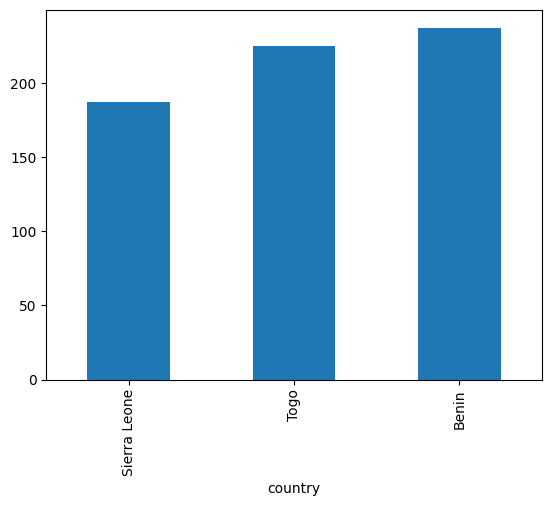

In [6]:
df_all.groupby("country")["GHI"].mean().sort_values().plot(kind="bar")

Benin has the highest average GHI among the three countries, suggesting the greatest solar potential. Togo ranks second, with slightly lower GHI values than Benin, but still favorable for solar applications. Sierra Leone has the lowest average GHI, indicating comparatively less solar irradiance, but still a viable candidate for solar energy with proper planning.